# Proyek Analisis Data: Bike Sharing Dataset 🚲

## Menentukan Pertanyaan Bisnis
1. **Tren:** Bagaimana performa penyewaan sepeda pada tahun 2012 dibandingkan 2011?
2. **Cuaca:** Seberapa besar pengaruh cuaca terhadap jumlah penyewa?
3. **Pola Jam:** Pada jam berapa saja terjadi lonjakan penyewaan?

# Import Library

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Mengatur tema visualisasi
sns.set_theme(style="whitegrid")

## Data Wrangling

### 1. Gathering Data
Kita akan memuat dua tabel utama, yaitu data harian (`day.csv`) dan data per jam (`hour.csv`).

In [56]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

print("Data berhasil dimuat!")
display(day_df.head())
display(hour_df.head())

Data berhasil dimuat!


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [57]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [58]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### 2. Cleaning & Merging Data
kita akan memperbaiki tipe data tanggal terlebih dahulu, lalu menggabungkan kedua dataset menjadi satu file utama (`main_data`) menggunakan metode **Merge**.

In [59]:
# Mengubah tipe data 'dteday' menjadi datetime agar bisa digabungkan
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menggabungkan Data (Merge)
# Kita menggunakan hour_df sebagai tabel utama (left) karena datanya lebih detail (per jam)
# Data dari day_df akan ditempelkan ke setiap baris di hour_df yang tanggalnya cocok.
main_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="dteday",
    right_on="dteday",
    suffixes=("_hourly", "_daily")
)

# Cek hasil penggabungan
print(f"Jumlah Baris: {main_df.shape[0]}")
print(f"Jumlah Kolom: {main_df.shape[1]}")
main_df.head()

Jumlah Baris: 17379
Jumlah Kolom: 32


,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### 3. Assessing & Cleaning Lanjutan
Setelah digabungkan, kita akan:
1. Memastikan tidak ada *Missing Values* atau *Duplikasi*.
2. Mengubah nilai angka (0, 1, 2...) menjadi label yang mudah dibaca (Spring, Summer, Clear, dll).
3. Menghapus kolom yang redundan (tidak terpakai).

In [60]:
# Cek Missing Values & Duplikasi
print("Jumlah Missing Values:", main_df.isna().sum().sum())
print("Jumlah Duplikasi:", main_df.duplicated().sum())

# Mapping Label (Agar Visualisasi Informatif)
# Menggunakan kolom dari hourly karena itu fokus utama kita

# Mapping Musim
main_df['season_hourly'] = main_df['season_hourly'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Mapping Cuaca
main_df['weathersit_hourly'] = main_df['weathersit_hourly'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice Pallets'
})

# Mapping Tahun
main_df['yr_hourly'] = main_df['yr_hourly'].map({
    0: '2011', 1: '2012'
})

# Menghapus kolom redundant dari day_df (karena kita fokus analisis mendalam per jam)
# Kolom daily yang isinya sama dengan hourly bisa dibuang untuk menghemat memori
drop_col = ['season_daily', 'weathersit_daily', 'yr_daily', 'mnth_daily', 'holiday_daily', 'weekday_daily', 'workingday_daily']
main_df.drop(columns=drop_col, inplace=True, errors='ignore')

# Rename kolom agar lebih enak dibaca saat coding
main_df.rename(columns={
    'dteday': 'date',
    'cnt_hourly': 'total_count',
    'hr': 'hour',
    'weathersit_hourly': 'weather_condition',
    'season_hourly': 'season',
    'yr_hourly': 'year'
}, inplace=True)

print("Data Cleaning Selesai!")
main_df.head()

Jumlah Missing Values: 0
Jumlah Duplikasi: 0
Data Cleaning Selesai!


,instant_hourly,date,season,year,mnth_hourly,hour,holiday_hourly,weekday_hourly,workingday_hourly,weather_condition,...,registered_hourly,total_count,instant_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,Spring,2011,1,0,0,6,0,Clear/Partly Cloudy,...,13,16,1,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Spring,2011,1,1,0,6,0,Clear/Partly Cloudy,...,32,40,1,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Spring,2011,1,2,0,6,0,Clear/Partly Cloudy,...,27,32,1,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Spring,2011,1,3,0,6,0,Clear/Partly Cloudy,...,10,13,1,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Spring,2011,1,4,0,6,0,Clear/Partly Cloudy,...,1,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985


## Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan melakukan eksplorasi mendalam, meliputi:
1.  **Statistik Deskriptif**: Melihat distribusi data penyewaan.
2.  **Analisis Korelasi**: Menentukan variabel numerik (Suhu, Kelembapan) yang paling memengaruhi jumlah sewa.
3.  **Segmentasi Pengguna**: Membandingkan perilaku pengguna *Casual* vs *Registered*.

Statistik Deskriptif Total Penyewa
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: total_count, dtype: float64

Korelasi Antar Variabel
total_count         1.000000
temp_hourly         0.404772
atemp_hourly        0.400929
windspeed_hourly    0.093234
hum_hourly         -0.322911
Name: total_count, dtype: float64


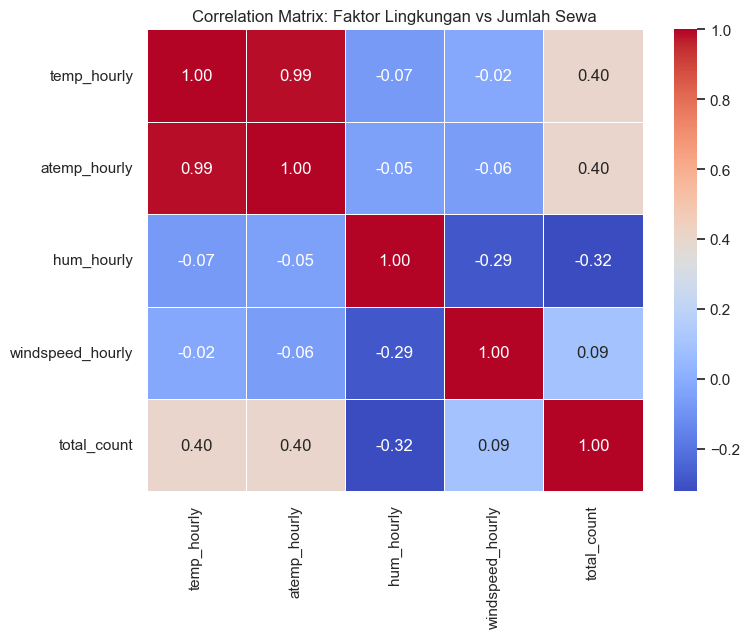

In [61]:
# Statistik Deskriptif
print("Statistik Deskriptif Total Penyewa")
print(main_df['total_count'].describe())

# Matriks Korelasi (Suhu, Kelembapan, Angin vs Total Sewa)
# Menggunakan kolom numerik asli dari hour_df (suffixed _hourly)
numeric_cols = ['temp_hourly', 'atemp_hourly', 'hum_hourly', 'windspeed_hourly', 'total_count']
correlation_matrix = main_df[numeric_cols].corr()

print("\nKorelasi Antar Variabel")
print(correlation_matrix['total_count'].sort_values(ascending=False))

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Faktor Lingkungan vs Jumlah Sewa")
plt.show()


Rata-rata Penyewaan: Casual vs Registered
                   casual_hourly  registered_hourly
workingday_hourly                                  
Holiday/Weekend        57.441422         123.963910
Working Day            25.561315         167.646439


<Figure size 1000x600 with 0 Axes>

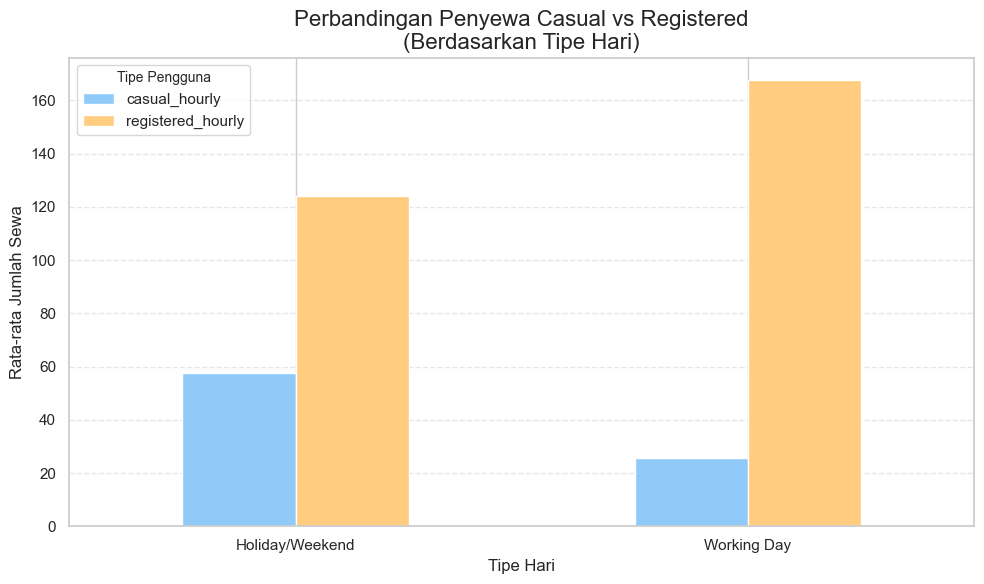

In [62]:
# Memastikan data sudah dalam bentuk kategori teks (Bukan 0 dan 1)
# Jika kolom 'workingday_hourly' masih angka, kita map ulang untuk visualisasi
# (Menggunakan replace agar aman jika sudah berupa teks sebelumnya)
main_df['workingday_hourly'] = main_df['workingday_hourly'].replace({
    0: 'Holiday/Weekend',
    1: 'Working Day'
})

# Grouping data
user_segmentation = main_df.groupby('workingday_hourly')[['casual_hourly', 'registered_hourly']].mean()

print("\nRata-rata Penyewaan: Casual vs Registered")
print(user_segmentation)

# Visualisasi
plt.figure(figsize=(10, 6))

# Mendefinisikan warna
colors = ['#90CAF9', '#FFCC80']

# Plotting menggunakan pandas plot
ax = user_segmentation.plot(kind='bar', figsize=(10, 6), color=colors, rot=0)

plt.title("Perbandingan Penyewa Casual vs Registered\n(Berdasarkan Tipe Hari)", fontsize=16)
plt.ylabel("Rata-rata Jumlah Sewa", fontsize=12)
plt.xlabel("Tipe Hari", fontsize=12)
plt.legend(title="Tipe Pengguna", title_fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5) # Grid tipis agar rapi

plt.tight_layout()
plt.show()

### Insight Hasil EDA:

Berdasarkan eksplorasi data di atas, kita mendapatkan wawasan penting mengenai perilaku penyewa:

1.  **Distribusi Data (Statistik Deskriptif)**:
    * Rata-rata penyewaan per jam adalah **189 unit**, namun standar deviasinya cukup tinggi (**181**). Ini menunjukkan variasi yang sangat besar; ada jam-jam yang sangat sepi (min: 1) dan ada jam-jam dengan lonjakan permintaan ekstrem (max: 977).

2.  **Faktor Lingkungan (Korelasi)**:
    * **Suhu (Temperature)** memiliki korelasi positif terkuat (**0.40**) terhadap jumlah penyewaan. Artinya, semakin hangat cuaca, semakin tinggi minat orang untuk bersepeda.
    * **Kelembapan (Humidity)** memiliki korelasi negatif (**-0.32**). Cuaca yang terlalu lembap/basah cenderung menurunkan jumlah penyewa.
    * **Kecepatan Angin** memiliki pengaruh yang sangat kecil (0.09), sehingga bukan faktor penentu utama.

3.  **Segmentasi Pengguna (Casual vs Registered)**:
    * **Pola Berbeda**: Terlihat perbedaan perilaku yang kontras antara dua tipe pengguna.
    * **Registered User** (Member): Lebih aktif pada **Working Day** (Rata-rata: 167) dibandingkan hari libur (124). Ini mengindikasikan mereka menggunakan sepeda untuk rutinitas (seperti berangkat kerja/kuliah).
    * **Casual User** (Non-member): Justru lebih aktif pada **Holiday/Weekend** (Rata-rata: 57) dibandingkan hari kerja (25). Ini memvalidasi bahwa mereka menyewa sepeda untuk tujuan rekreasi/wisata saat libur.

# Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda pada tahun 2012 dibandingkan 2011?

C:\Users\erlan\AppData\Local\Temp\ipykernel_13644\3357497337.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = main_df.resample(rule='M', on='date').agg({


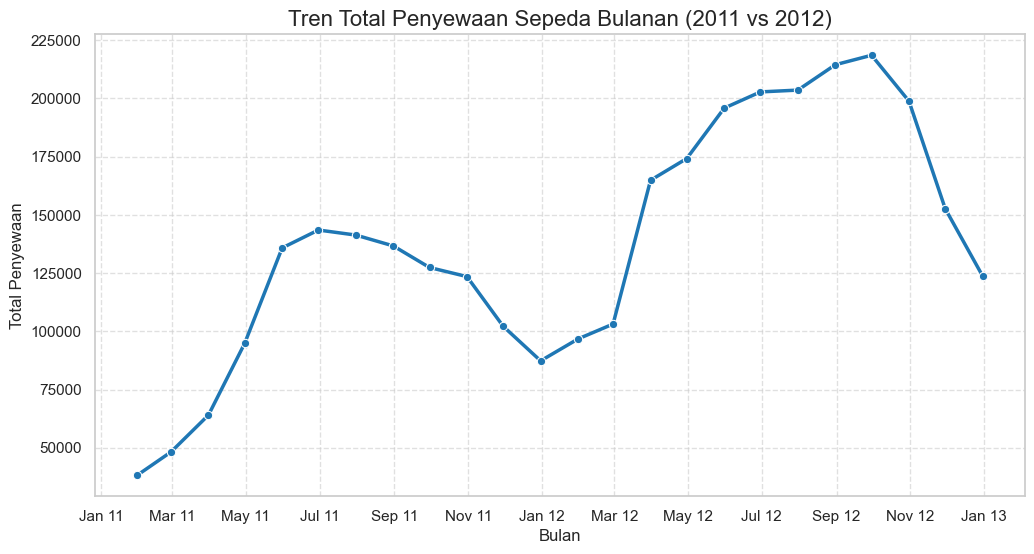

In [63]:
# Mengelompokkan data per bulan
monthly_trend = main_df.resample(rule='M', on='date').agg({
    'total_count': 'sum'
})
monthly_trend.reset_index(inplace=True)

# Membuat Line Chart untuk melihat tren dan perbandingan tahun
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x='date',
    y='total_count',
    data=monthly_trend,
    marker='o',
    linewidth=2.5,
    color='#1f77b4'
)

# Mengatur format tanggal sumbu X agar mudah dibaca (Bulan Tahun)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.title('Tren Total Penyewaan Sepeda Bulanan (2011 vs 2012)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Pertanyaan 2: Seberapa besar pengaruh cuaca terhadap jumlah penyewa?

C:\Users\erlan\AppData\Local\Temp\ipykernel_13644\578842008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


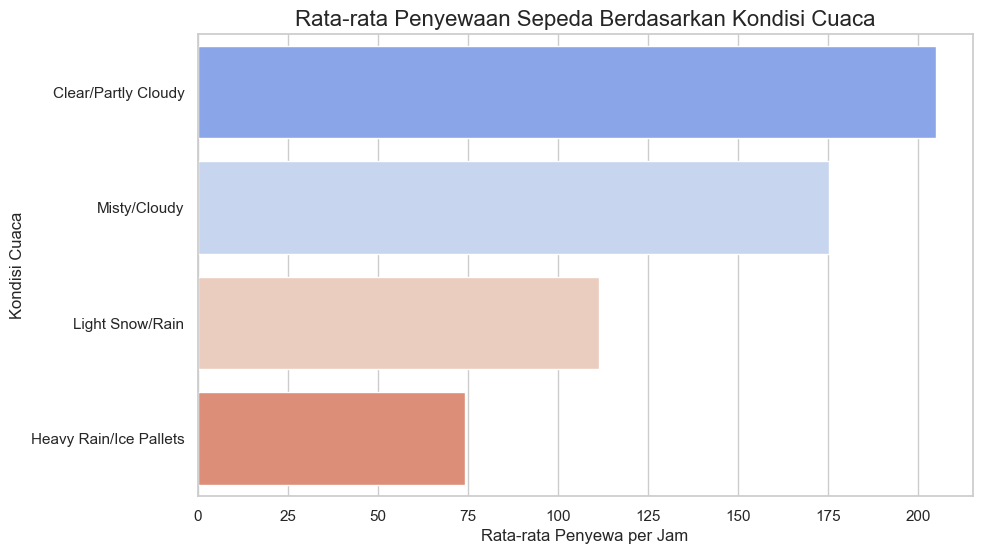

In [64]:
# Menghitung rata-rata penyewaan per kondisi cuaca
# Pastikan urutan cuaca logis (Cerah -> Mendung -> Hujan)
weather_order = ['Clear/Partly Cloudy', 'Misty/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Ice Pallets']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='total_count',
    y='weather_condition',
    data=main_df,
    palette='coolwarm',
    order=[x for x in weather_order if x in main_df['weather_condition'].unique()], # Hanya plot cuaca yang ada datanya
    errorbar=None
)

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Rata-rata Penyewa per Jam', fontsize=12)
plt.ylabel('Kondisi Cuaca', fontsize=12)
plt.show()

### Pertanyaan 3: Pada jam berapa saja terjadi lonjakan penyewaan?

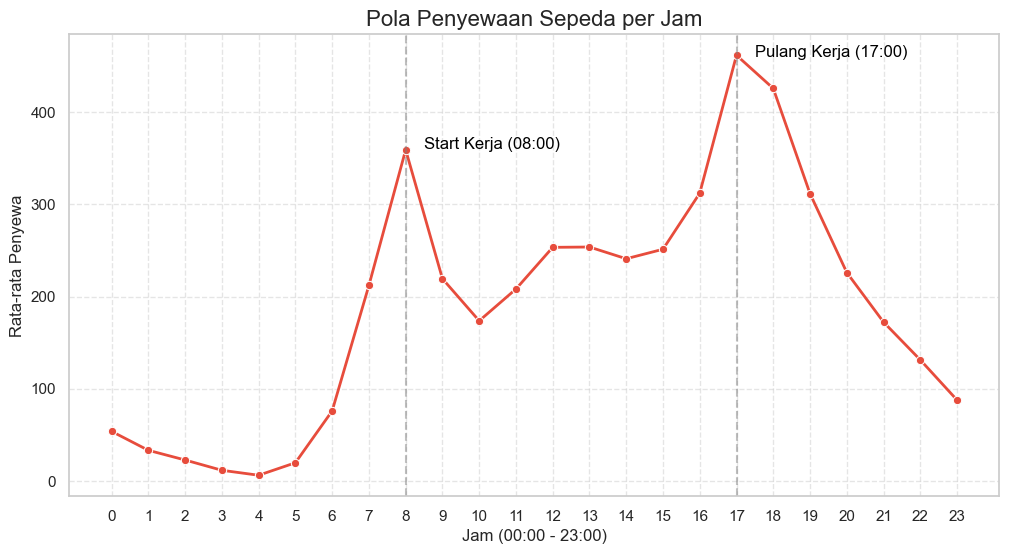

In [65]:
# Melihat pola rata-rata penyewaan per jam
hourly_trend = main_df.groupby('hour')['total_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='hour',
    y='total_count',
    data=hourly_trend,
    marker='o',
    color='#e74c3c',
    linewidth=2
)

plt.title('Pola Penyewaan Sepeda per Jam', fontsize=16)
plt.xlabel('Jam (00:00 - 23:00)', fontsize=12)
plt.ylabel('Rata-rata Penyewa', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

# Menandai titik puncak
plt.axvline(x=8, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=17, color='gray', linestyle='--', alpha=0.5)
plt.text(8.5, 360, 'Start Kerja (08:00)', color='black')
plt.text(17.5, 460, 'Pulang Kerja (17:00)', color='black')

plt.show()

## Analisis Lanjutan: Clustering Jam Sibuk

Untuk memperjelas jawaban Pertanyaan 3, kita mengelompokkan jam menjadi kategori waktu: **Morning**, **Afternoon**, **Evening**, dan **Night**.

C:\Users\erlan\AppData\Local\Temp\ipykernel_13644\2287941365.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_category', y='total_count', data=main_df, order=order, palette='viridis', errorbar=None)


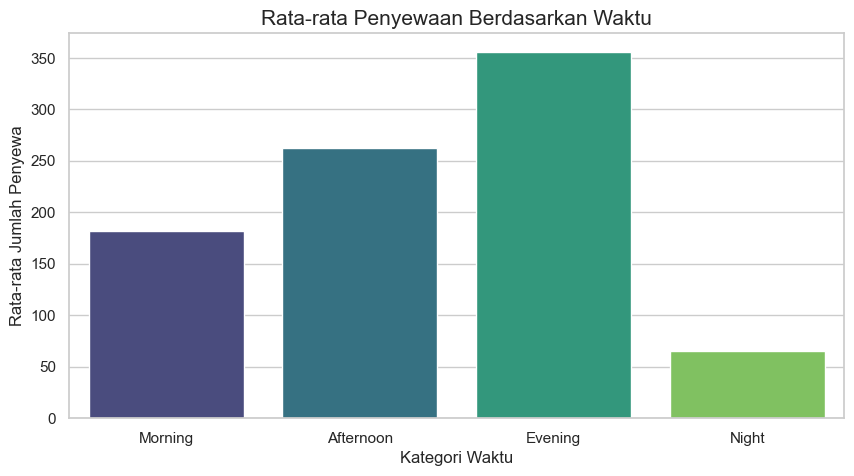

In [66]:
def categorize_time(hour):
    if 5 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'

main_df['time_category'] = main_df['hour'].apply(categorize_time)

# Visualisasi Kategori
plt.figure(figsize=(10, 5))
order = ['Morning', 'Afternoon', 'Evening', 'Night']
sns.barplot(x='time_category', y='total_count', data=main_df, order=order, palette='viridis', errorbar=None)
plt.title('Rata-rata Penyewaan Berdasarkan Waktu', fontsize=15)
plt.xlabel('Kategori Waktu', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.show()

In [67]:
# Simpan dataset ke folder dashboard untuk digunakan di Streamlit
main_df.to_csv("dashboard/main_data.csv", index=False)
print("File 'main_data.csv' berhasil disimpan di folder dashboard!")

File 'main_data.csv' berhasil disimpan di folder dashboard!


## Kesimpulan

1.  **Analisis Tren (Pertanyaan 1):**
    Performa penyewaan sepeda pada tahun **2012 jauh lebih baik dibandingkan 2011**. Tren menunjukkan pertumbuhan positif yang konsisten setiap bulannya. Puncak penyewaan terjadi pada bulan **September 2012**, sebelum akhirnya menurun secara musiman di akhir tahun (Desember).

2.  **Analisis Cuaca (Pertanyaan 2):**
    Cuaca memiliki **pengaruh yang sangat signifikan**. Kondisi **Cerah/Berawan** adalah kondisi optimal dengan rata-rata penyewaan tertinggi. Sebaliknya, hujan atau salju ringan dapat menurunkan jumlah penyewa

3.  **Analisis Pola Jam (Pertanyaan 3):**
    Lonjakan penyewaan (*Rush Hour*) terjadi secara konsisten pada dua waktu utama:
    * **Pagi Hari (08:00)**: Saat orang berangkat beraktivitas.
    * **Sore Hari (17:00 - 18:00)**: Saat orang pulang beraktivitas (puncak tertinggi).
    Pola ini menegaskan bahwa mayoritas pengguna menggunakan sepeda untuk kebutuhan mobilitas harian (*Commuting*).